## 1. Pandas

In [1]:
from pandas import Series, DataFrame

In [2]:
# Series (data, index)
# fruit은 series
fruit = Series([2500,3800,1200,600], index = ['apple', 'banana', 'peer', 'cherry'])

In [3]:
print(fruit)

apple     2500
banana    3800
peer      1200
cherry     600
dtype: int64


#### index와 value를 추출

In [4]:
print(fruit.index)
print(fruit.values)

Index(['apple', 'banana', 'peer', 'cherry'], dtype='object')
[2500 3800 1200  600]


In [5]:
# Dict 표현
fruitData = {
    'apple' : 2500, 
    'banana': 3800,
    'peer'  : 1200,
    'cheery': 600
}
# dictionary를 series 객체로 만들어냄
fruit = Series(fruitData)

#### datatype 출력

In [6]:
print(type(fruitData))
print(type(fruit))
print(fruit)

<class 'dict'>
<class 'pandas.core.series.Series'>
apple     2500
banana    3800
peer      1200
cheery     600
dtype: int64


#### Series 객체의 이름과 column name을 설정하기

In [7]:
fruit.name = 'fruitPrice'
fruit.index.name = 'fruitName'

In [8]:
print(fruit)

fruitName
apple     2500
banana    3800
peer      1200
cheery     600
Name: fruitPrice, dtype: int64


In [9]:
# DataFrame
fruitData = {
    'fruitName'  : ['apple', 'banana', 'cherry', 'peer'],
    'fruitPrice' : [2500, 3800, 6000, 1200],
    'num'        : [10,5,3,8]
}

In [10]:
# fruitFrame은 dataframe
fruitFrame = DataFrame(fruitData)
fruitFrame

,fruitName,fruitPrice,num
0,apple,2500,10
1,banana,3800,5
2,cherry,6000,3
3,peer,1200,8


#### Column 순서 지정하기

In [11]:
fruitFrame = DataFrame(fruitData, columns= ['fruitPrice', 'num','fruitName'])
fruitFrame

,fruitPrice,num,fruitName
0,2500,10,apple
1,3800,5,banana
2,6000,3,cherry
3,1200,8,peer


#### 특정 항목을 print하기

In [12]:
fruitFrame.fruitName # or fruitFrame['fruitName'] 

0     apple
1    banana
2    cherry
3      peer
Name: fruitName, dtype: object

#### column 추가하기

In [13]:
fruitFrame['Year'] = '2022'
fruitFrame

,fruitPrice,num,fruitName,Year
0,2500,10,apple,2022
1,3800,5,banana,2022
2,6000,3,cherry,2022
3,1200,8,peer,2022


#### Series 객체의 추가

In [14]:
variable = Series([4,2,1], index = [0, 2, 3]) # 1번 index는 비어서 null 값이 저장된다
fruitFrame['Stock'] = variable
fruitFrame

,fruitPrice,num,fruitName,Year,Stock
0,2500,10,apple,2022,4.0
1,3800,5,banana,2022,NaN
2,6000,3,cherry,2022,2.0
3,1200,8,peer,2022,1.0


##  자료 구조를 다뤄보기

#### 데이터 구조의 항목 삭제

In [15]:
fruit

fruitName
apple     2500
banana    3800
peer      1200
cheery     600
Name: fruitPrice, dtype: int64

#### 삭제: 지워진 객체를 return해줌 (drop)

In [16]:
newFruit = fruit.drop('banana')
newFruit

# fruit = fruit.drop('banana')

fruitName
apple     2500
peer      1200
cheery     600
Name: fruitPrice, dtype: int64

#### index를 특정한 keyword로 바꾸기

In [17]:
# furitData는 Dictionary
fruitData

{'fruitName': ['apple', 'banana', 'cherry', 'peer'],
 'fruitPrice': [2500, 3800, 6000, 1200],
 'num': [10, 5, 3, 8]}

In [18]:
# fruitName은 배열
fruitName = fruitData['fruitName']
fruitName

['apple', 'banana', 'cherry', 'peer']

In [19]:
fruitFrame = DataFrame(fruitData, index= fruitName, columns= ['fruitPrice', 'num'])
fruitFrame

,fruitPrice,num
apple,2500,10
banana,3800,5
cherry,6000,3
peer,1200,8


In [20]:
newFruitFrame = fruitFrame.drop(['apple', 'cherry'])
newFruitFrame

,fruitPrice,num
banana,3800,5
peer,1200,8


In [21]:
# newFruitFrame = fruitFrame.drop(['num'], axis =0) 일 때는 행에 num이 없으므로 에러가 생김
newFruitFrame = fruitFrame.drop(['num'], axis =1)
newFruitFrame

,fruitPrice
apple,2500
banana,3800
cherry,6000
peer,1200


#### pandas에서 slicing하기

In [22]:
fruit

fruitName
apple     2500
banana    3800
peer      1200
cheery     600
Name: fruitPrice, dtype: int64

In [23]:
fruit['apple':'peer']

fruitName
apple     2500
banana    3800
peer      1200
Name: fruitPrice, dtype: int64

#### series 객체의 기본연산

In [24]:
fruit1 = Series([5,9,10,3], index=['apple', 'banana', 'cherry', 'peer'])
fruit2 = Series([3,2,9,5, 10], index=['apple','orange', 'banana', 'cherry', 'mango'])

In [25]:
newFruit = fruit1 + fruit2
newFruit

apple      8.0
banana    18.0
cherry    15.0
mango      NaN
orange     NaN
peer       NaN
dtype: float64

#### DataFrame 객체의 기본 연산

In [26]:
fruitData1 = {'Ohio': [4,8,3,5], 'Texas': [0,1,2,3] }
fruitData2 = {'Ohio': [3,0,2,1,7], 'Colorado': [5,4,3,6, 0] }

fruitFrame1 = DataFrame(fruitData1, columns = ['Ohio', 'Texas'], 
                        index=['apple', 'banana', 'cheery', 'peer'] )
fruitFrame2 = DataFrame(fruitData2, columns = ['Ohio', 'Colorado'], 
                        index=['apple', 'orange', 'banana', 'cherry', 'mango'] )

In [27]:
fruitFrame1

,Ohio,Texas
apple,4,0
banana,8,1
cheery,3,2
peer,5,3


In [28]:
fruitFrame2

,Ohio,Colorado
apple,3,5
orange,0,4
banana,2,3
cherry,1,6
mango,7,0


In [29]:
newFruitFrame = fruitFrame1 + fruitFrame2
newFruitFrame

,Colorado,Ohio,Texas
apple,NaN,7.0,NaN
banana,NaN,10.0,NaN
cheery,NaN,NaN,NaN
cherry,NaN,NaN,NaN
mango,NaN,NaN,NaN
orange,NaN,NaN,NaN
peer,NaN,NaN,NaN


## 데이터 정렬

#### Series의 정렬

In [30]:
fruit

fruitName
apple     2500
banana    3800
peer      1200
cheery     600
Name: fruitPrice, dtype: int64

In [31]:
# 기본값 fruit.sort_values(ascending = True)
fruit.sort_values()

fruitName
cheery     600
peer      1200
apple     2500
banana    3800
Name: fruitPrice, dtype: int64

In [32]:
fruit.sort_values(ascending= False)

fruitName
banana    3800
apple     2500
peer      1200
cheery     600
Name: fruitPrice, dtype: int64

#### Dataframe의 정렬

In [33]:
fruitData

{'fruitName': ['apple', 'banana', 'cherry', 'peer'],
 'fruitPrice': [2500, 3800, 6000, 1200],
 'num': [10, 5, 3, 8]}

In [34]:
fruitName = fruitData['fruitName']
fruitFrame = DataFrame(fruitData, index = fruitName, columns= ['num','fruitPrice'])
fruitFrame

,num,fruitPrice
apple,10,2500
banana,5,3800
cherry,3,6000
peer,8,1200


In [35]:
fruitFrame.sort_index()

,num,fruitPrice
apple,10,2500
banana,5,3800
cherry,3,6000
peer,8,1200


In [36]:
fruitFrame.sort_index(ascending= False)

,num,fruitPrice
peer,8,1200
cherry,3,6000
banana,5,3800
apple,10,2500


In [37]:
fruitFrame.sort_index(axis=1)

,fruitPrice,num
apple,2500,10
banana,3800,5
cherry,6000,3
peer,1200,8


In [38]:
fruitFrame.sort_values( by = ['fruitPrice'] )

,num,fruitPrice
peer,8,1200
apple,10,2500
banana,5,3800
cherry,3,6000


In [39]:
# 정렬할 column을 지정해야한다
fruitFrame.sort_values( by = ['fruitPrice', 'num'] )

,num,fruitPrice
peer,8,1200
apple,10,2500
banana,5,3800
cherry,3,6000


### Pandas를 이용한 기초 분석

In [40]:
import pandas as pd

In [41]:
german = pd.read_csv('german_credit.csv')
german

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


In [42]:
german.columns.values

array(['Creditability', 'Account Balance', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Value Savings/Stocks', 'Length of current employment',
       'Instalment per cent', 'Sex & Marital Status', 'Guarantors',
       'Duration in Current address', 'Most valuable available asset',
       'Age (years)', 'Concurrent Credits', 'Type of apartment',
       'No of Credits at this Bank', 'Occupation', 'No of dependents',
       'Telephone', 'Foreign Worker'], dtype=object)

In [43]:
german_sample = german[['Creditability','Duration of Credit (month)', 'Purpose', 'Credit Amount']]
german_sample.head()

,Creditability,Duration of Credit (month),Purpose,Credit Amount
0,1,18,2,1049
1,1,9,0,2799
2,1,12,9,841
3,1,12,0,2122
4,1,12,0,2171


In [44]:
# 최소
german_sample.min()

Creditability                   0
Duration of Credit (month)      4
Purpose                         0
Credit Amount                 250
dtype: int64

In [45]:
# 최대
german_sample.max()

Creditability                     1
Duration of Credit (month)       72
Purpose                          10
Credit Amount                 18424
dtype: int64

In [46]:
# 평균
german_sample.mean()

Creditability                    0.700
Duration of Credit (month)      20.903
Purpose                          2.828
Credit Amount                 3271.248
dtype: float64

In [47]:
# 상관계수 구하기
german_sample.corr()

,Creditability,Duration of Credit (month),Purpose,Credit Amount
Creditability,1.000000,-0.214927,-0.017979,-0.154740
Duration of Credit (month),-0.214927,1.000000,0.147492,0.624988
Purpose,-0.017979,0.147492,1.000000,0.068480
Credit Amount,-0.154740,0.624988,0.068480,1.000000


## Group화 하기
#### for a, b in dataframe.groupby(['속성1'])
    1. a는 key
    2. b는 '속성1'로 그룹화된 데이터
#### for (a1 a2), b in dataframe.groupby(['속성1', '속성2])
    1. a1은 속성1의 key
    2. a2은 속성2의 key
    3. b는 '속성1', '속성2'로 그룹화된 데이터
    4. 그룹화 할 속성이 2개 이상일 때는 tuple로 묶어서 생성해야함

In [48]:
# Group By를 이용한 계산 및 요약 통계
german_sample = german[['Credit Amount', 'Type of apartment']]
german_sample

,Credit Amount,Type of apartment
0,1049,1
1,2799,1
2,841,1
3,2122,1
4,2171,2
...,...,...
995,1987,1
996,2303,2
997,12680,3
998,6468,2


In [49]:
# 'type of apartment'로 그룹화 되어있는 'Credit Amount'를 보기
german_grouped = german_sample['Credit Amount'].groupby(german_sample['Type of apartment'])

In [50]:
german_grouped.mean()

Type of apartment
1    3122.553073
2    3067.257703
3    4881.205607
Name: Credit Amount, dtype: float64

In [51]:
german_grouped.max()

Type of apartment
1    15945
2    18424
3    14782
Name: Credit Amount, dtype: int64

In [52]:
# 3가지 속성을 가진 german_sample dataframe 생성
german_sample = german[['Type of apartment', 'Sex & Marital Status', 'Credit Amount']]

In [53]:
# type에는 groupby를 한 ' type of apartment'
# group에는 그룹화 되어있는 data들
for type, group in german_sample.groupby('Type of apartment'):
    print('-'*100)
    print(type)
    print(group.head(3))

----------------------------------------------------------------------------------------------------
1
   Type of apartment  Sex & Marital Status  Credit Amount
0                  1                     2           1049
1                  1                     3           2799
2                  1                     2            841
----------------------------------------------------------------------------------------------------
2
   Type of apartment  Sex & Marital Status  Credit Amount
4                  2                     3           2171
6                  2                     3           3398
7                  2                     3           1361
----------------------------------------------------------------------------------------------------
3
    Type of apartment  Sex & Marital Status  Credit Amount
29                  3                     3           4796
44                  3                     3           1239
69                  3                     3       

#### 2개 이상 groupby할 때는 tuple로 묶어줄 것 !!

In [54]:
# type : type of apartment
# sex  : Sex & Marital Status
for (type, sex), group in german_sample.groupby(['Type of apartment', 'Sex & Marital Status']):
    print('-'*100)
    print(type, sex)
    print(group.head(2))

----------------------------------------------------------------------------------------------------
1 1
     Type of apartment  Sex & Marital Status  Credit Amount
369                  1                     1           3021
777                  1                     1           3384
----------------------------------------------------------------------------------------------------
1 2
   Type of apartment  Sex & Marital Status  Credit Amount
0                  1                     2           1049
2                  1                     2            841
----------------------------------------------------------------------------------------------------
1 3
   Type of apartment  Sex & Marital Status  Credit Amount
1                  1                     3           2799
3                  1                     3           2122
----------------------------------------------------------------------------------------------------
1 4
    Type of apartment  Sex & Marital Status  Credit 

#### 행성 데이터 가져오기

In [55]:
import seaborn as sns
planets = sns.load_dataset('planets')

In [56]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


#### Null 값 처리하기
    1. 해당하는 row를 삭제 (dropna()): 데이터 양이 충분할 경우 사용가능
    2. 임의의 숫자로 대처하는 법(ex. 0,1): 데이터 양이 충분하지 못할경우 but 데이터의 흐름이 깨질 수 있음
    3. 전체 데이터의 평균값을 넣음: data흐름을 최대한 깨지 않는 동시에 충분하지 않은 데이터양의 단점을 극복

In [57]:
planets.shape

(1035, 6)

In [58]:
# dropna(): Null값이 있으면 그 해당 row를 삭제
planets= planets.dropna()
planets.shape

(498, 6)

#### 새로운 데이터 프레임

In [59]:
df_births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')

In [60]:
df_births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [61]:
df_births.shape

(15547, 5)

In [62]:
df_births['decade'] = df_births.year//10*10
df_births.head()

,year,month,day,gender,births,decade
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960


### 아래와 같은 표로 만들기
||Male|Gender|
|:---:|:---:|:---:|
|1960|||
|1970|||
|1980|||
|1990|||
|2000|||

#### pivot_table(data, index= '', columns= '', aggfunc= '')

In [63]:
df_births.pivot_table('births', index='decade', columns='gender', aggfunc= 'sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [64]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='decade'>

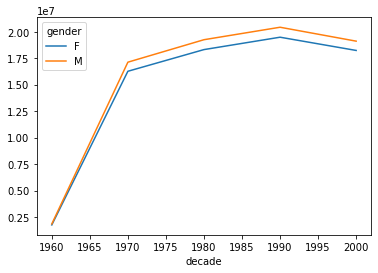

In [65]:
df_births.pivot_table('births', index='decade', columns='gender', aggfunc= 'sum').plot()

<AxesSubplot:xlabel='year'>

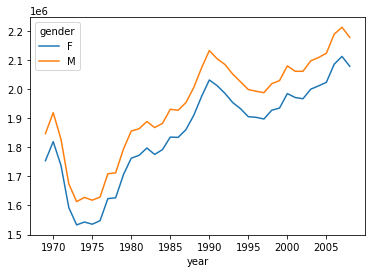

In [66]:
df_births.pivot_table('births', index='year', columns='gender', aggfunc= 'sum').plot()